idx = 0 DP = 1 CP = 1 PP = 8: 45991.47 ms
idx = 1 DP = 1 CP = 1 PP = 8: 44787.39 ms
idx = 2 DP = 1 CP = 1 PP = 8: 44791.28 ms
idx = 3 DP = 1 CP = 1 PP = 8: 44991.31 ms
idx = 4 DP = 1 CP = 1 PP = 8: 45191.34 ms
idx = 5 DP = 1 CP = 1 PP = 8: 45391.38 ms
idx = 6 DP = 1 CP = 1 PP = 8: 45591.41 ms
idx = 7 DP = 1 CP = 1 PP = 8: 45791.44 ms
idx = 8 DP = 1 CP = 1 PP = 8: 45491.39 ms
idx = 9 DP = 1 CP = 1 PP = 8: 44991.31 ms
idx = 10 DP = 1 CP = 1 PP = 8: 44491.23 ms
idx = 11 DP = 1 CP = 1 PP = 8: 43991.15 ms
idx = 12 DP = 1 CP = 1 PP = 8: 44335.38 ms
idx = 13 DP = 1 CP = 1 PP = 8: 44887.41 ms
idx = 14 DP = 1 CP = 1 PP = 8: 45439.44 ms
idx = 15 DP = 1 CP = 1 PP = 8: 45991.47 ms


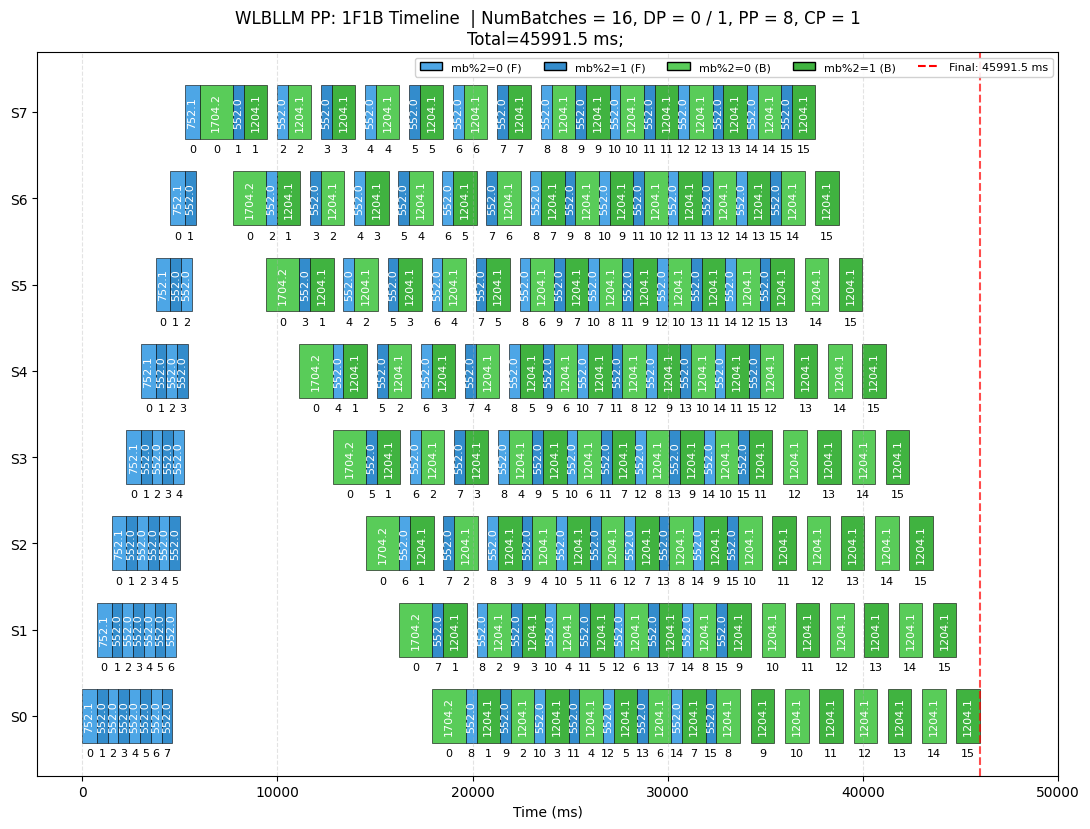

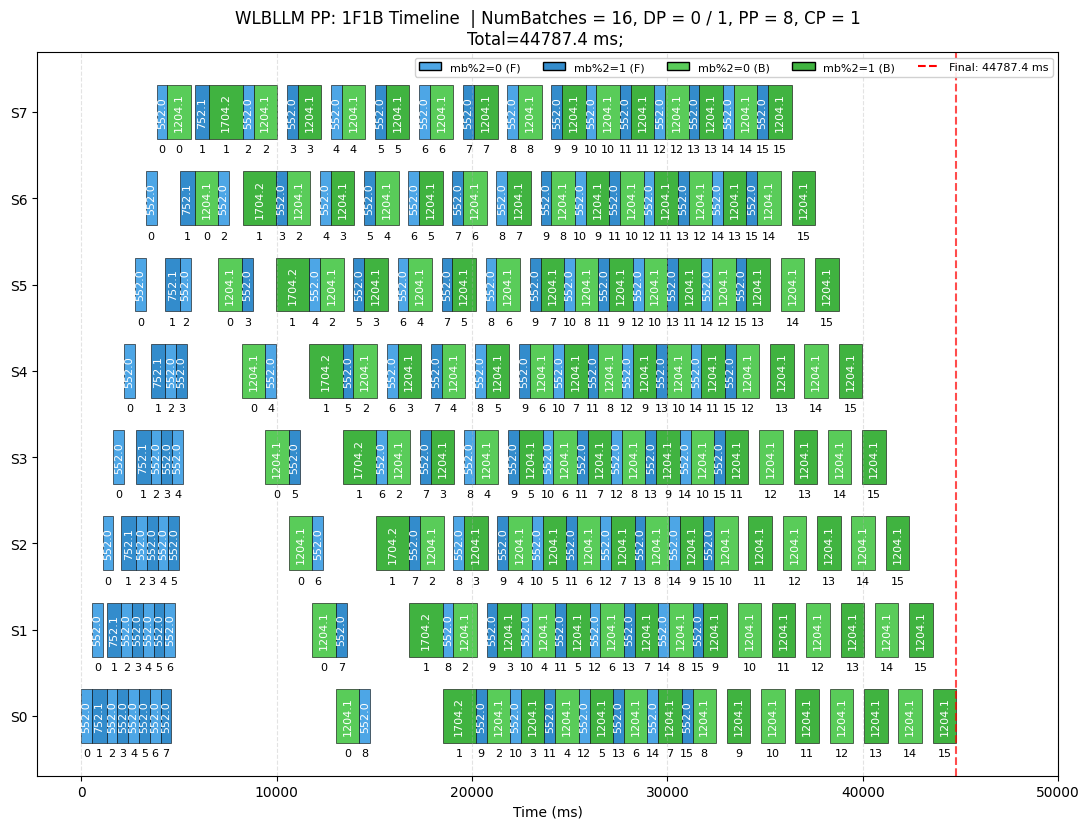

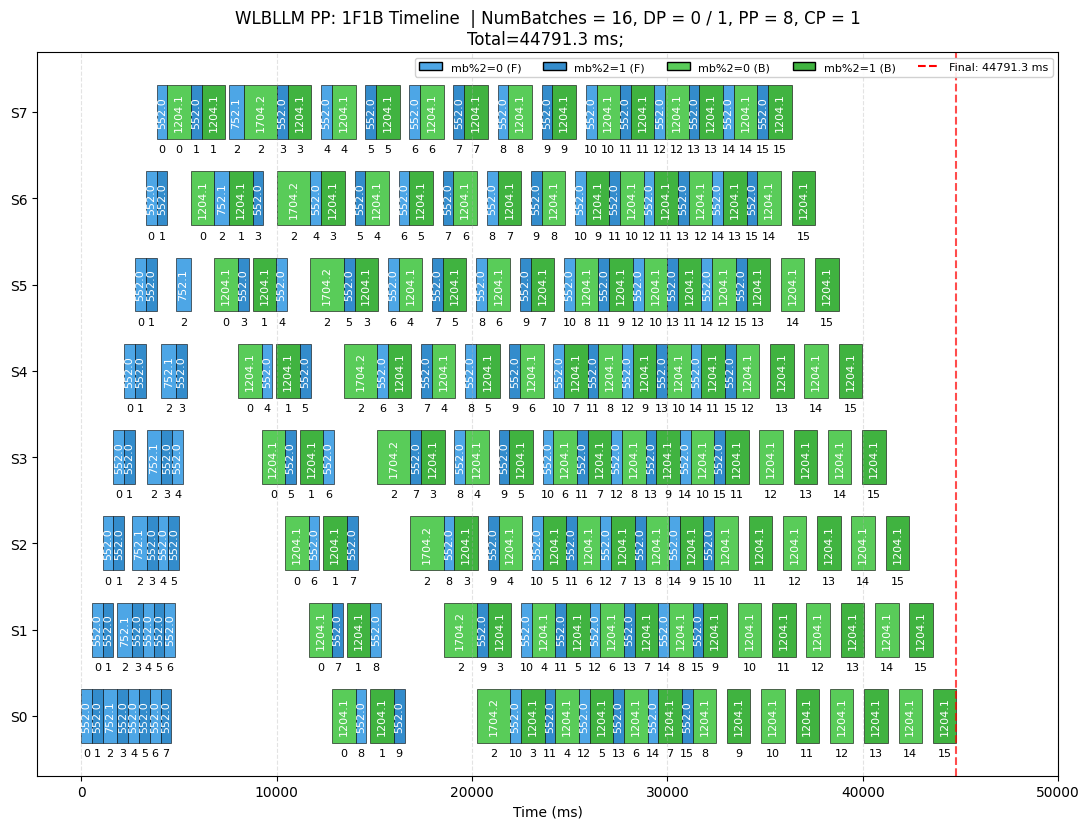

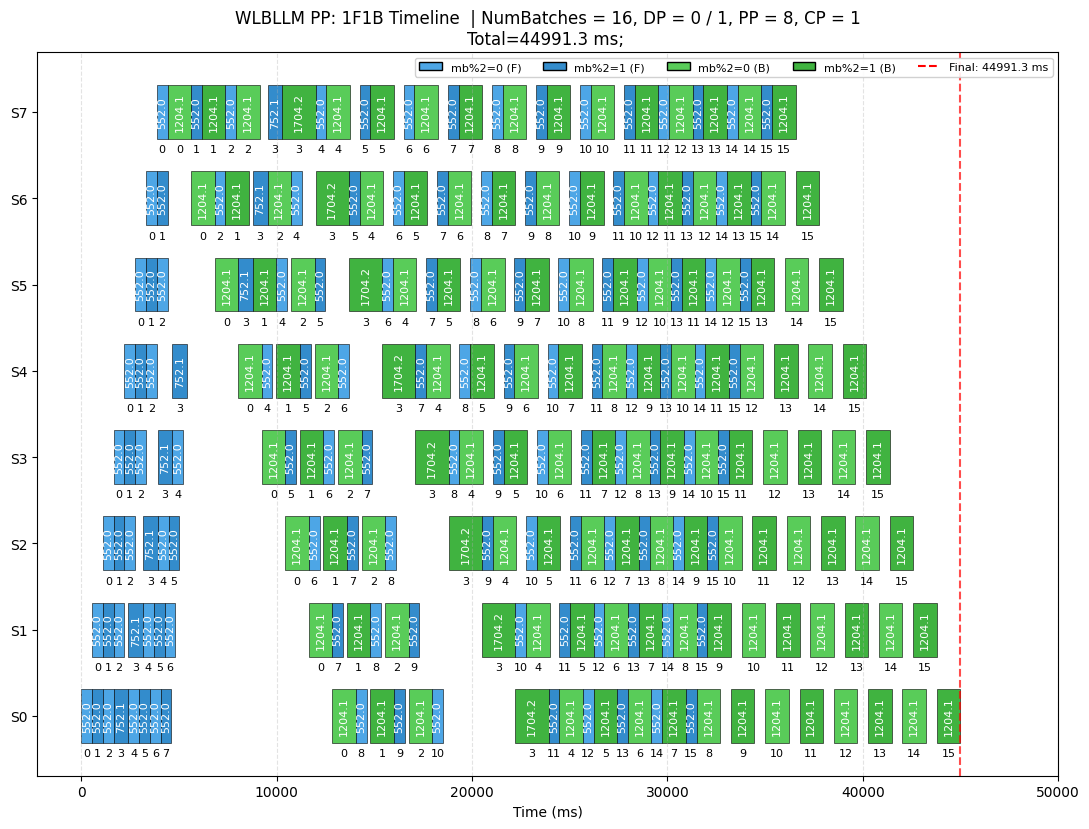

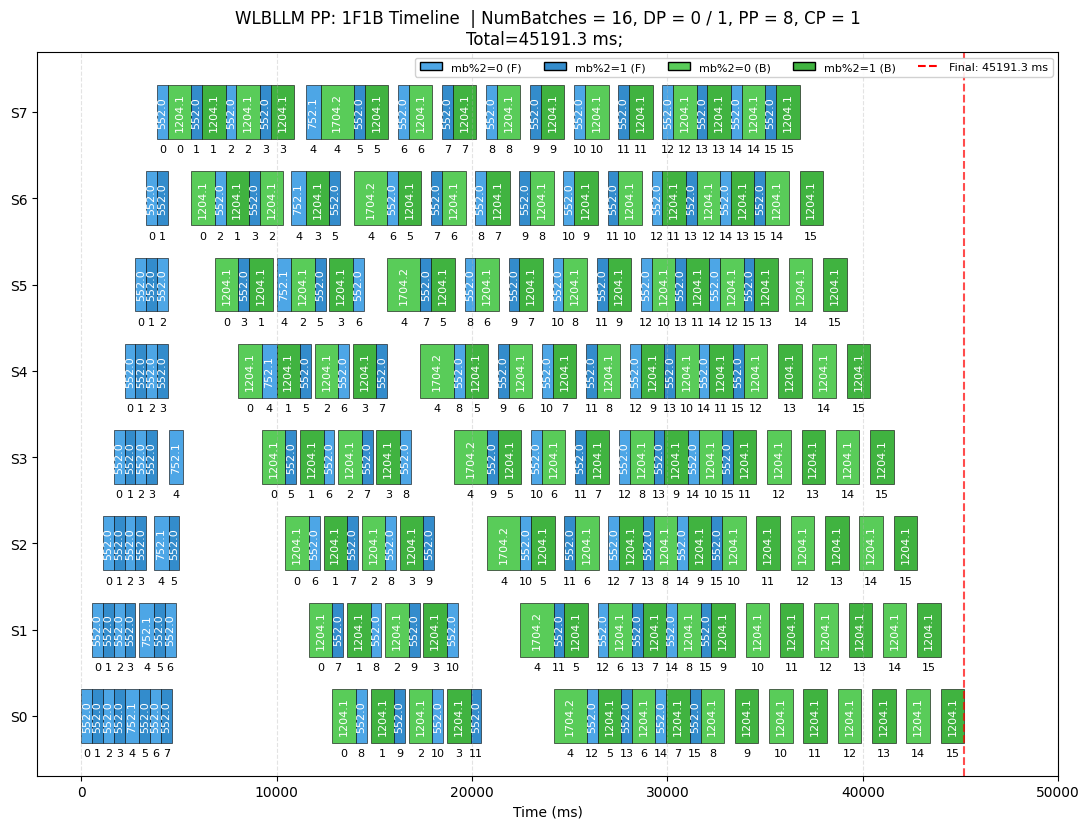

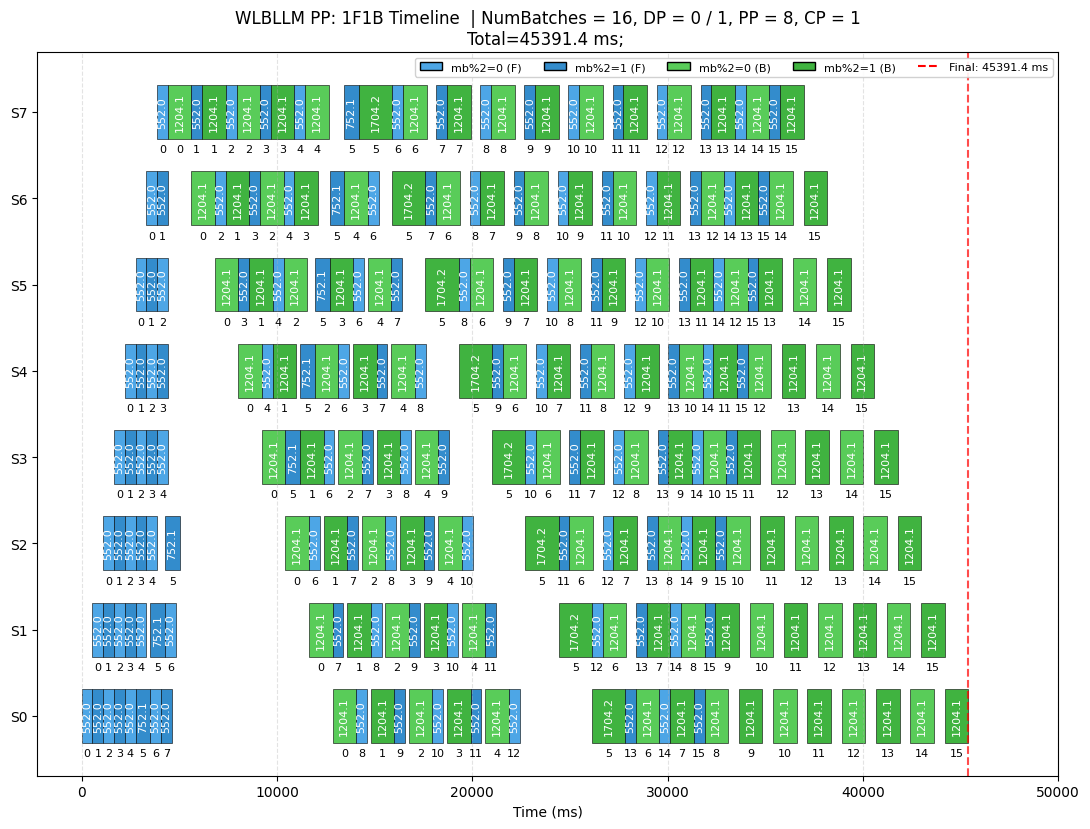

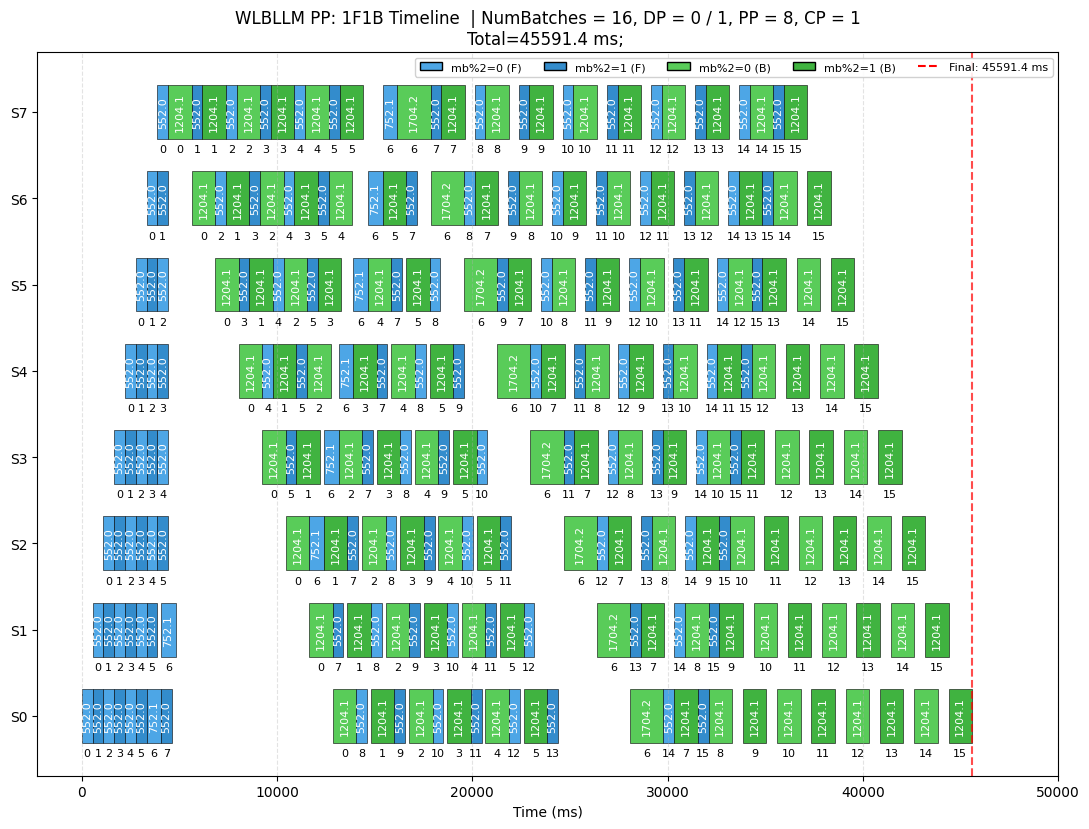

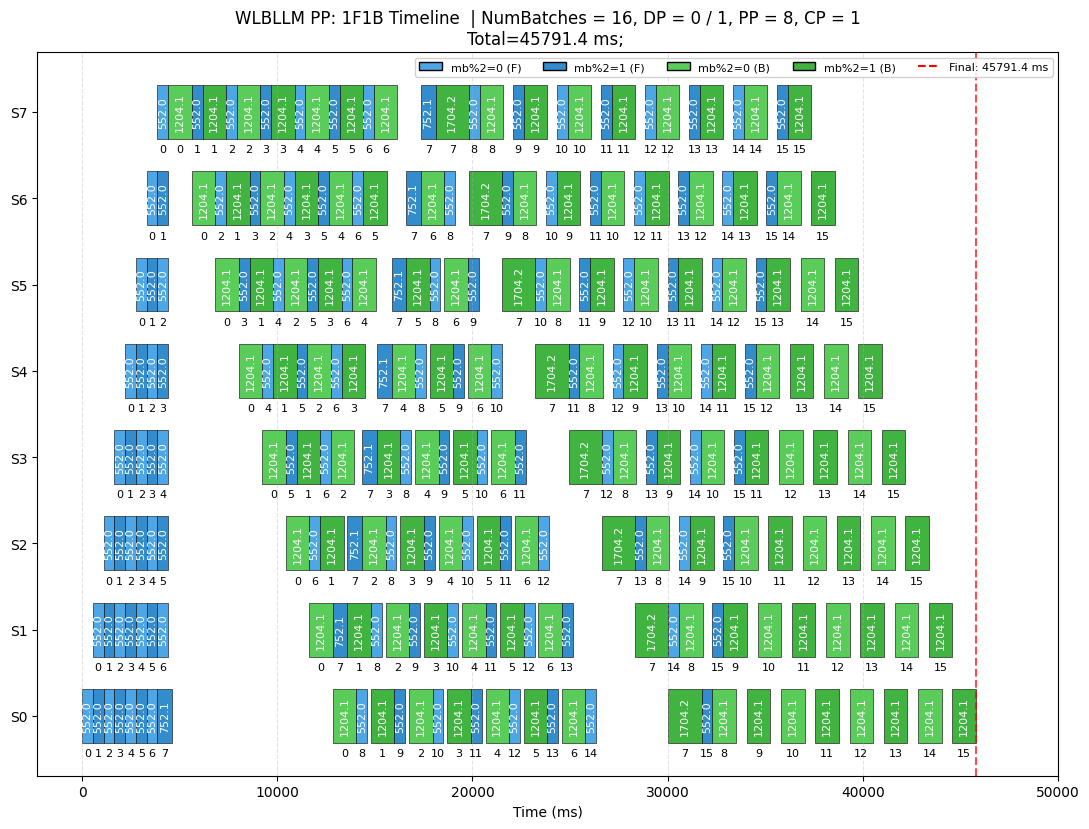

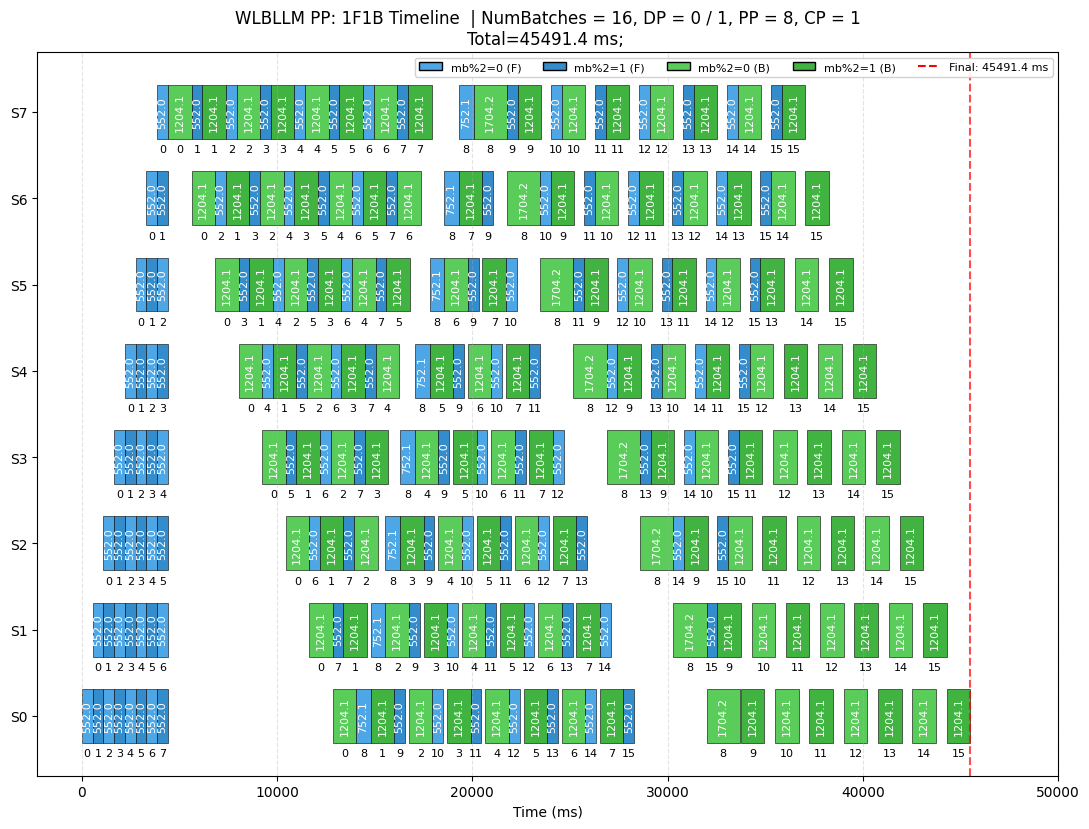

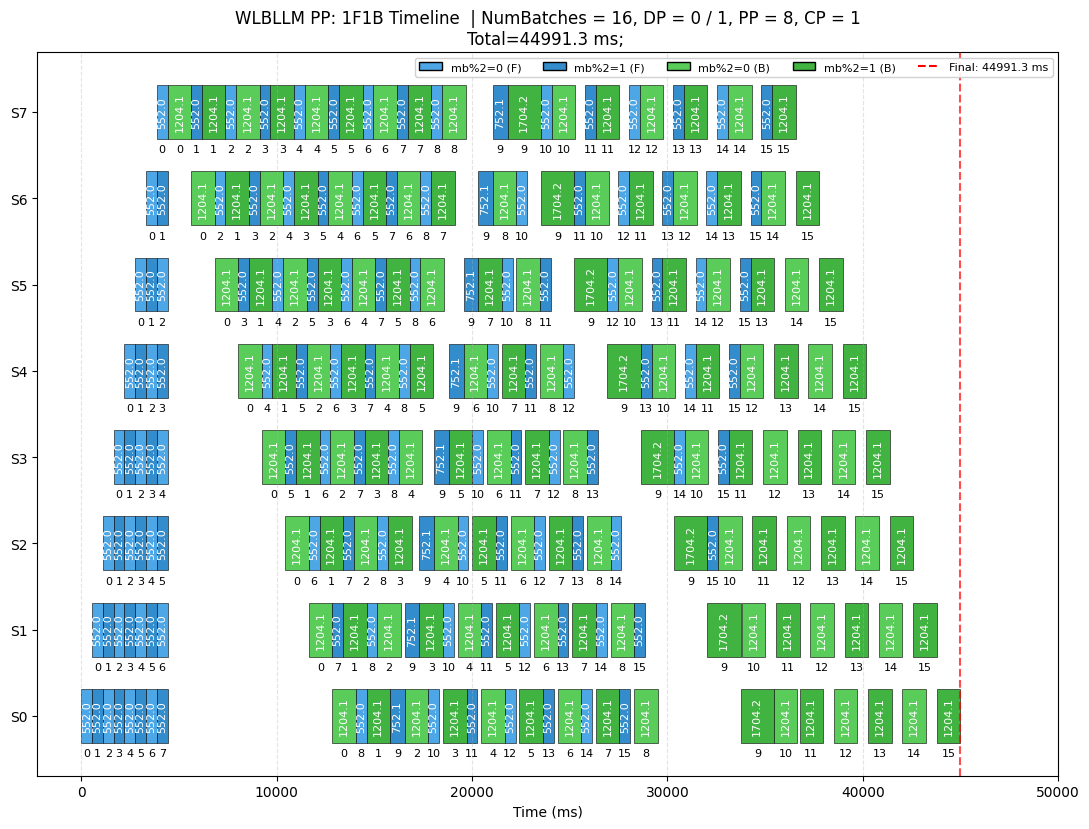

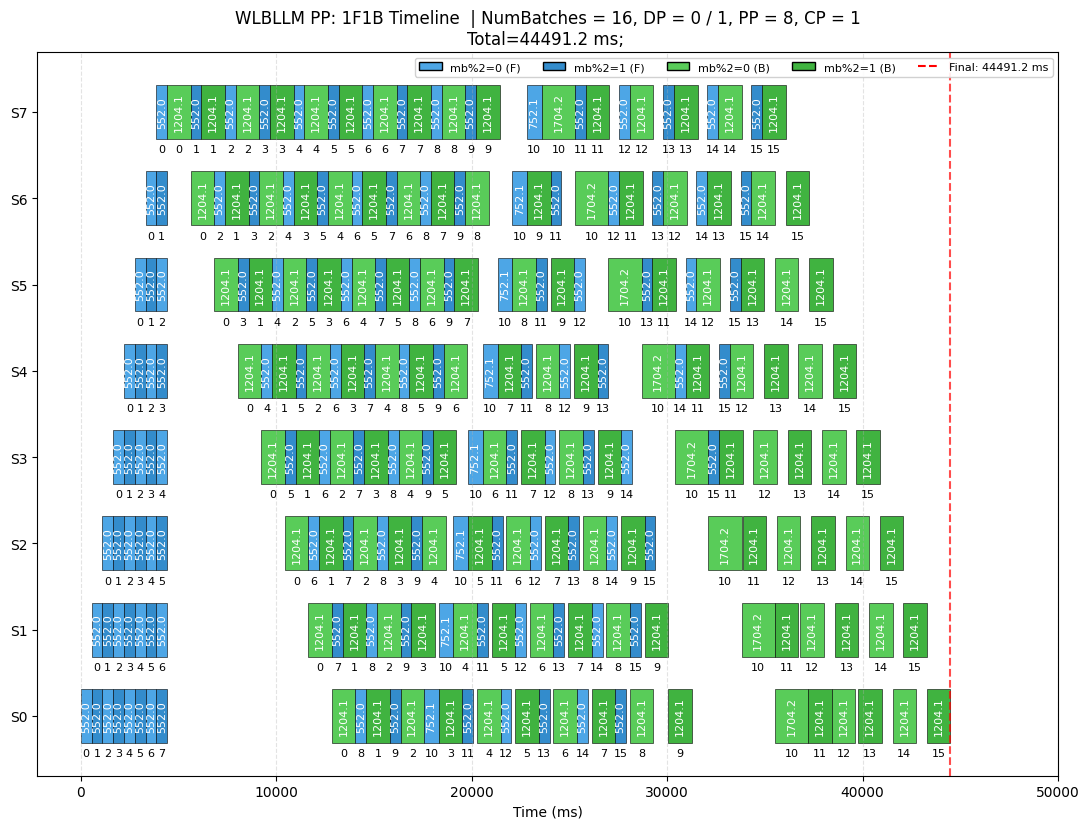

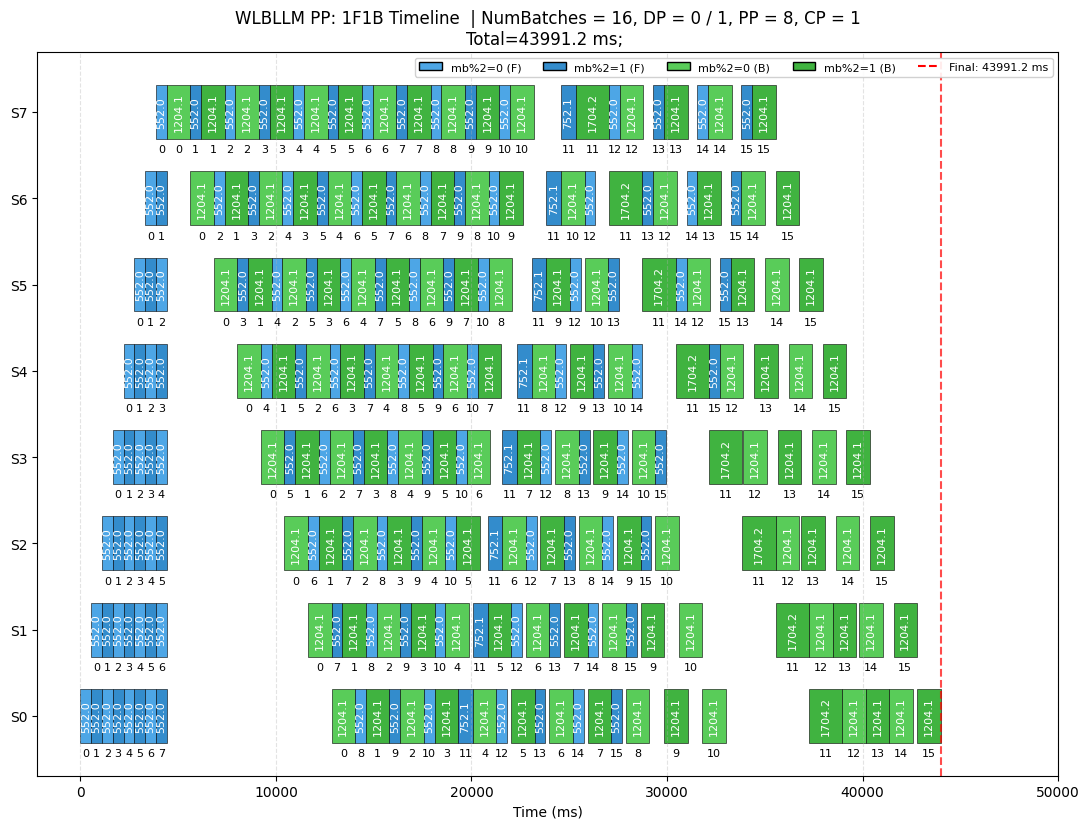

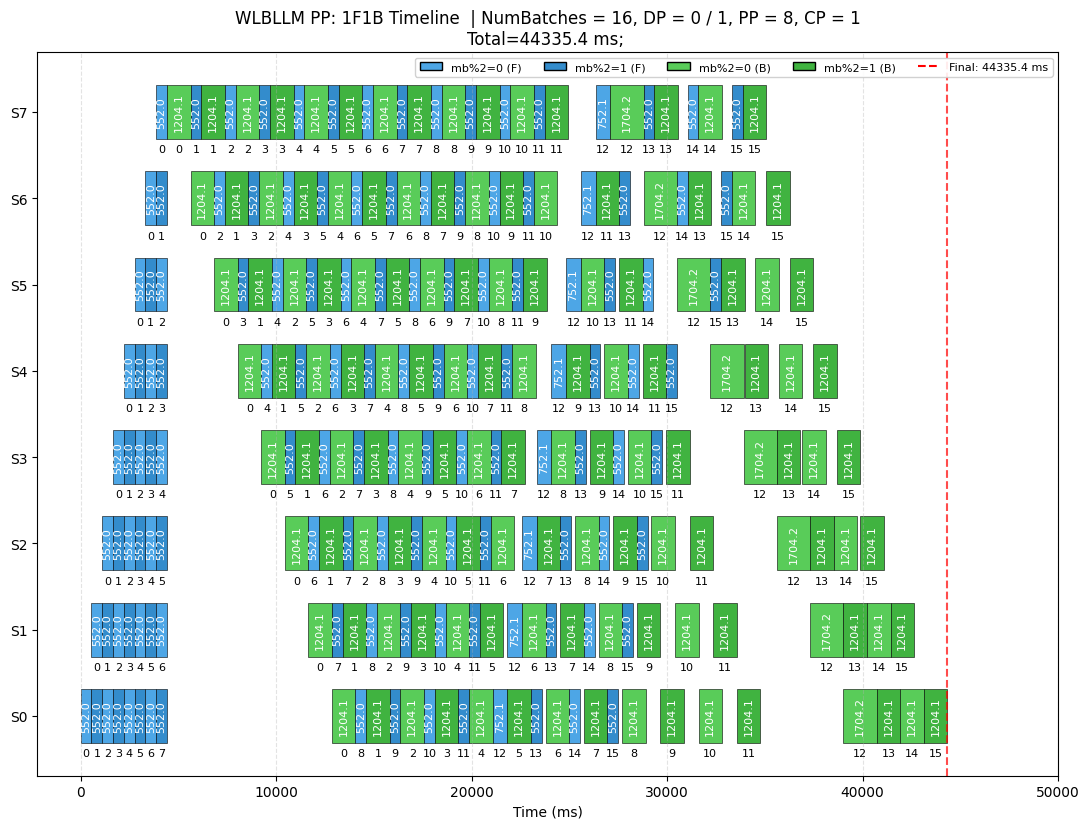

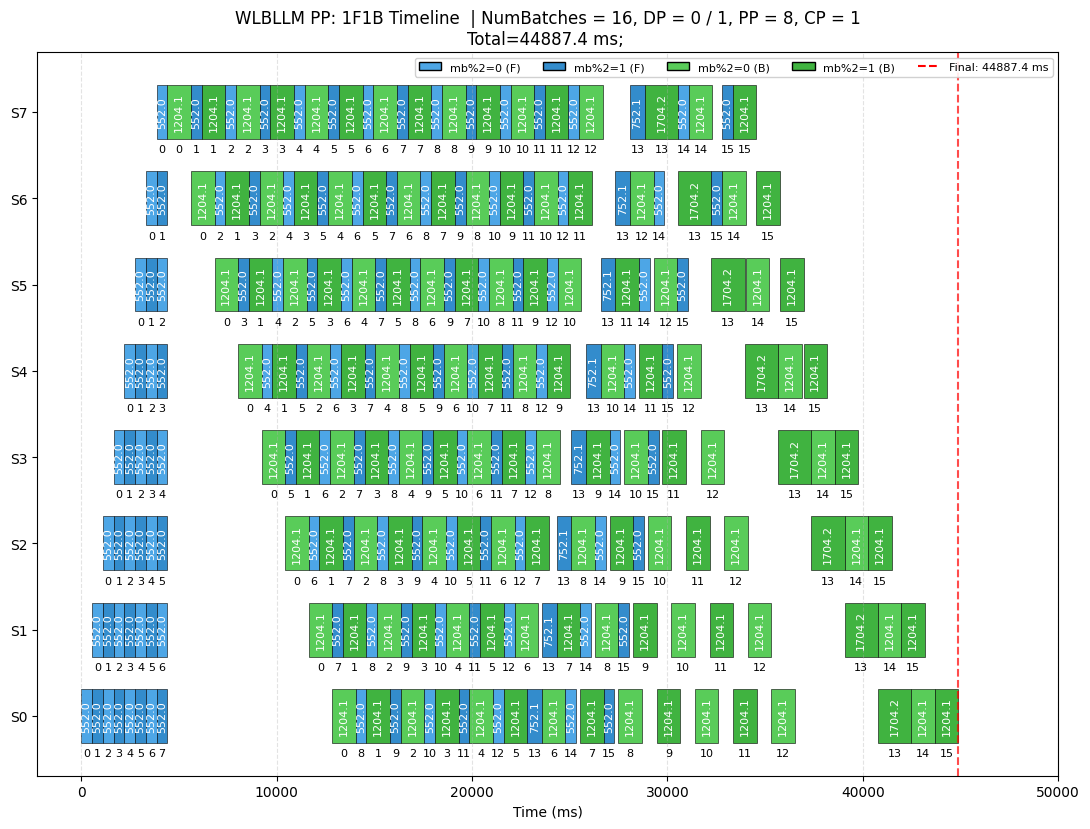

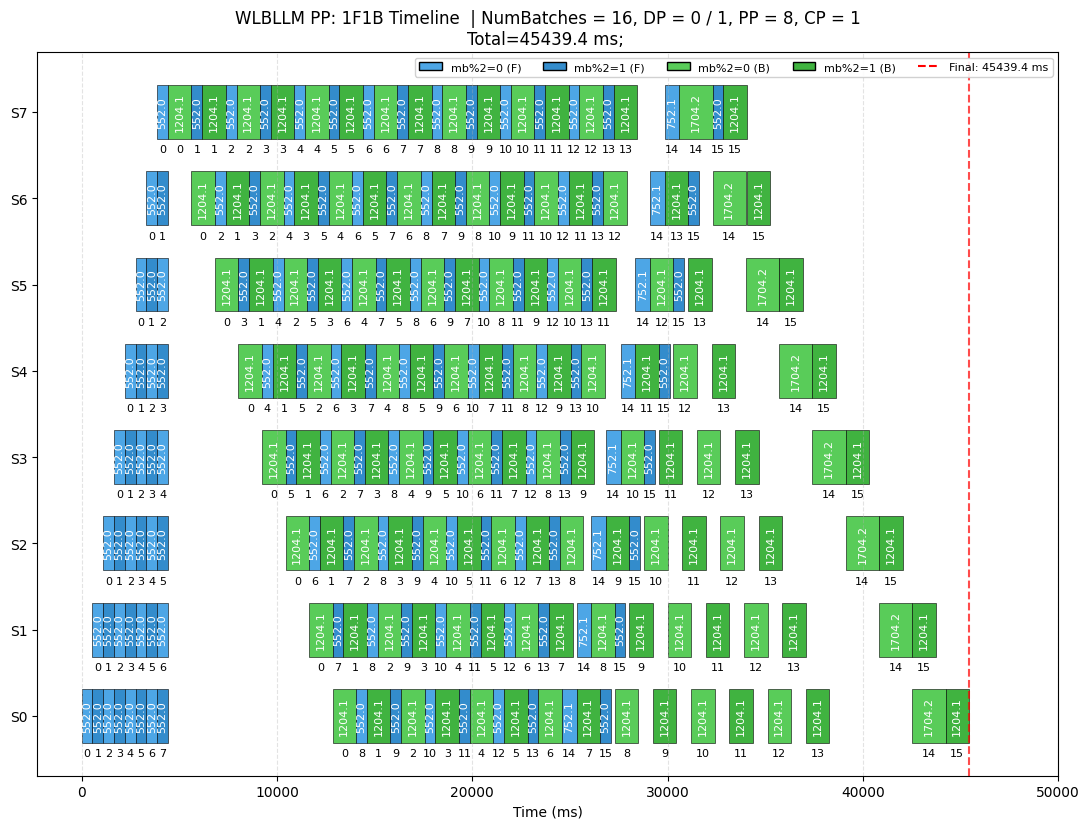

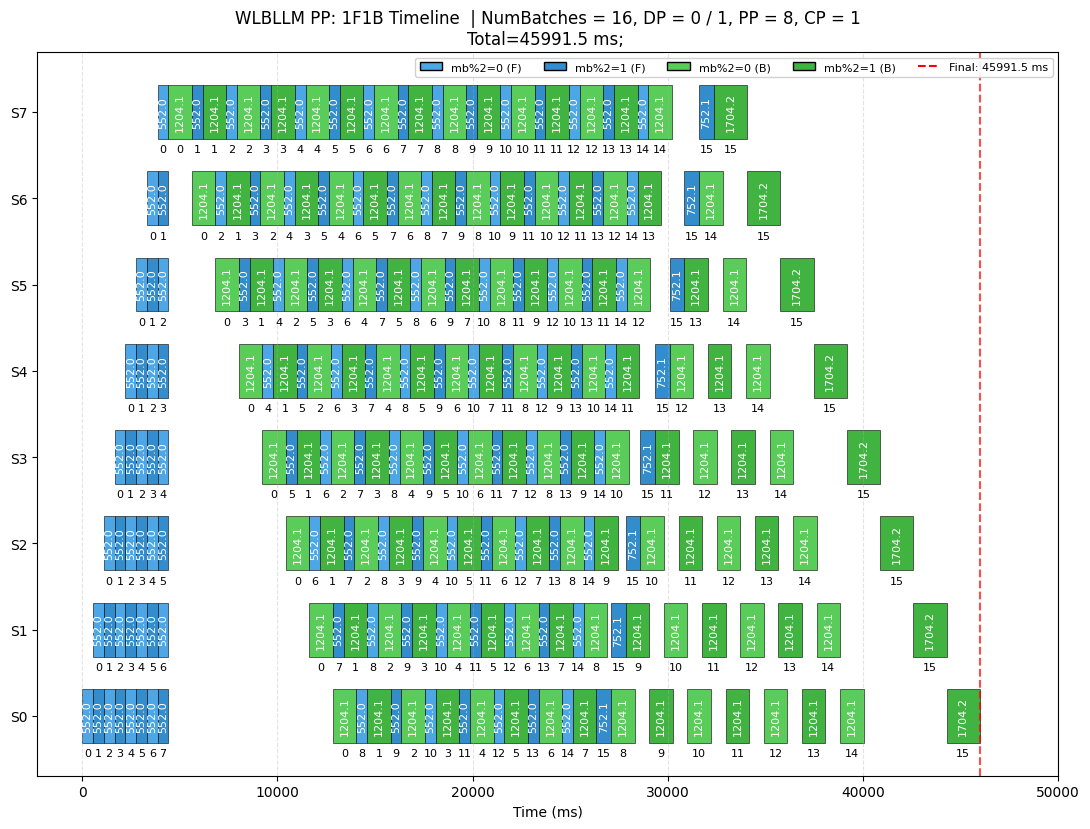

In [ ]:
# %%

# Run WLBLLM

reports = {}

# for wlb_dp_size in [1,2,4,8]:
#     for wlb_cp_size in [1,2,4,8]:
#         for pp_size in [1,2,4,8]:


_batches = [
    [64 * K] * 2,
] * (16 - 1)

disable_wlb_reorder = True


for idx in range(16):
    batches = _batches.copy()
    batches.insert(idx, [128 * K])
    # print(f"Insert [128 * K] at idx = {idx}: {batches}")

    for (wlb_dp_size, wlb_cp_size, pp_size) in [
        (1, 1, 8),
        # (1, 1, 4),
        # (1, 1, 2),
    ]:
        # if wlb_dp_size * wlb_cp_size * pp_size != 8:
        #     continue

        DP = wlb_dp_size
        CP = wlb_cp_size
        PP = pp_size
        factor = 4

        max_time = 0
        if disable_wlb_reorder:
            new_batches = batches
        else:
            num_buckets = min(DP * PP * factor, len(batches)) # to make PP enter steady state
            new_batches = sim_pp_wlb.get_workload_balancing_batches_no_defer(
                batches, num_buckets=num_buckets,
            )

        # print(f"{DP = } {CP = } {PP = }: {len(new_batches) = }, {sum(sum(b) for b in new_batches)}")
        for dp_rank in range(DP):
            dp_batch = new_batches[dp_rank * (PP * factor): (dp_rank + 1) * (PP * factor)]
            # print(f"DP Rank = {dp_rank}: {len(dp_batch) = }, dp_batch = {dp_batch}")
            # print(dp_batch)
            wlbllm_events = sim_pp_wlb.run_iteration(
                dp_batch, 
                PP, 
                nlayers=nlayers, 
                wlb_cp=wlb_cp_size,
            )

            _ = sim_pp_wlb.plot_timeline(
                wlbllm_events,
                title_suffix=(
                    f" | NumBatches = {num_batches}, DP = {dp_rank} / {wlb_dp_size}, "
                    f"PP = {pp_size}, CP = {wlb_cp_size}"
                ),
                granularity=10000, 
                save_path="wlbllm_timeline.png"
            )
            # plt.show()
            wlb_end_time = max([e[-1] for e in wlbllm_events])
            max_time = max(max_time, wlb_end_time)
            # print(f"WLBLLM End Time DP Rank = {dp_rank}: {wlb_end_time}ms")
        # print(f"WLBLLM {DP = } {CP = } {PP = }: {max_time}ms")
        reports[(idx, DP, CP, PP)] = max_time


for (idx, DP, CP, PP), max_time in reports.items():
    print(f"{idx = } {DP = } {CP = } {PP = }: {max_time:.2f} ms")

idx = 0 DP = 1 CP = 1 PP = 8: 31442.50 ms
idx = 1 DP = 1 CP = 1 PP = 8: 29738.34 ms
idx = 2 DP = 1 CP = 1 PP = 8: 29242.14 ms
idx = 3 DP = 1 CP = 1 PP = 8: 28942.10 ms
idx = 4 DP = 1 CP = 1 PP = 8: 29486.35 ms
idx = 5 DP = 1 CP = 1 PP = 8: 30238.42 ms
idx = 6 DP = 1 CP = 1 PP = 8: 30990.48 ms
idx = 7 DP = 1 CP = 1 PP = 8: 31742.54 ms


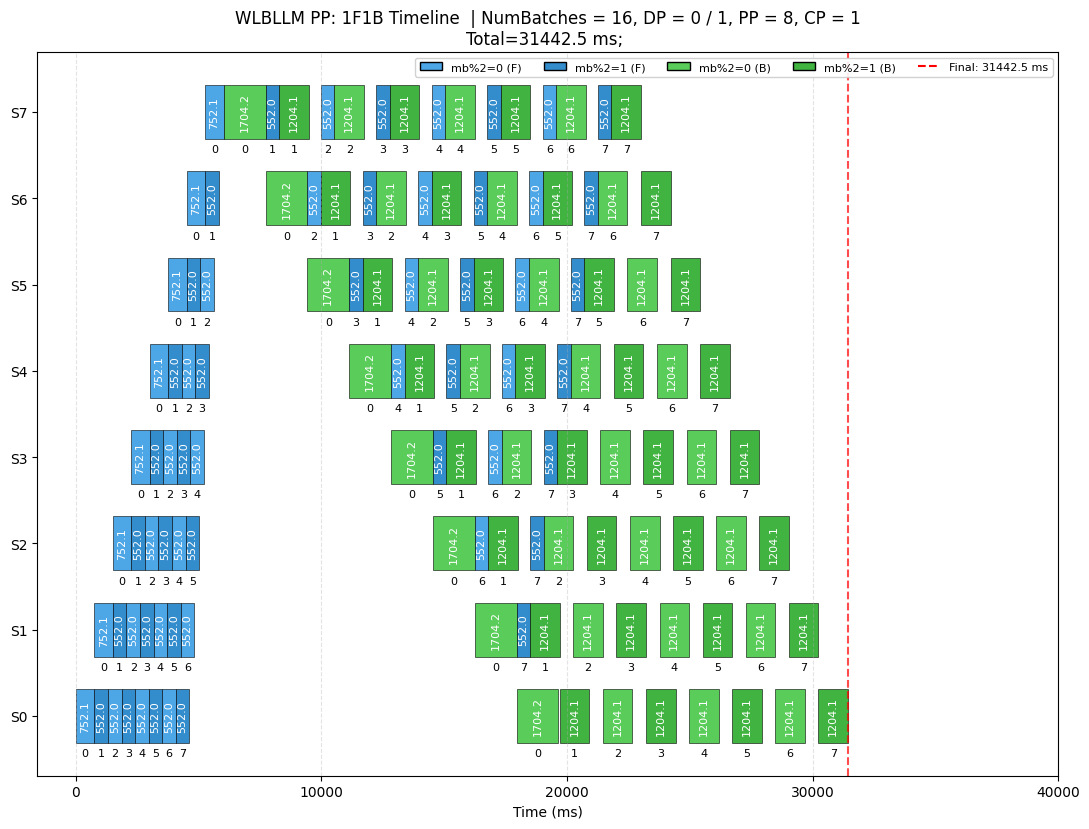

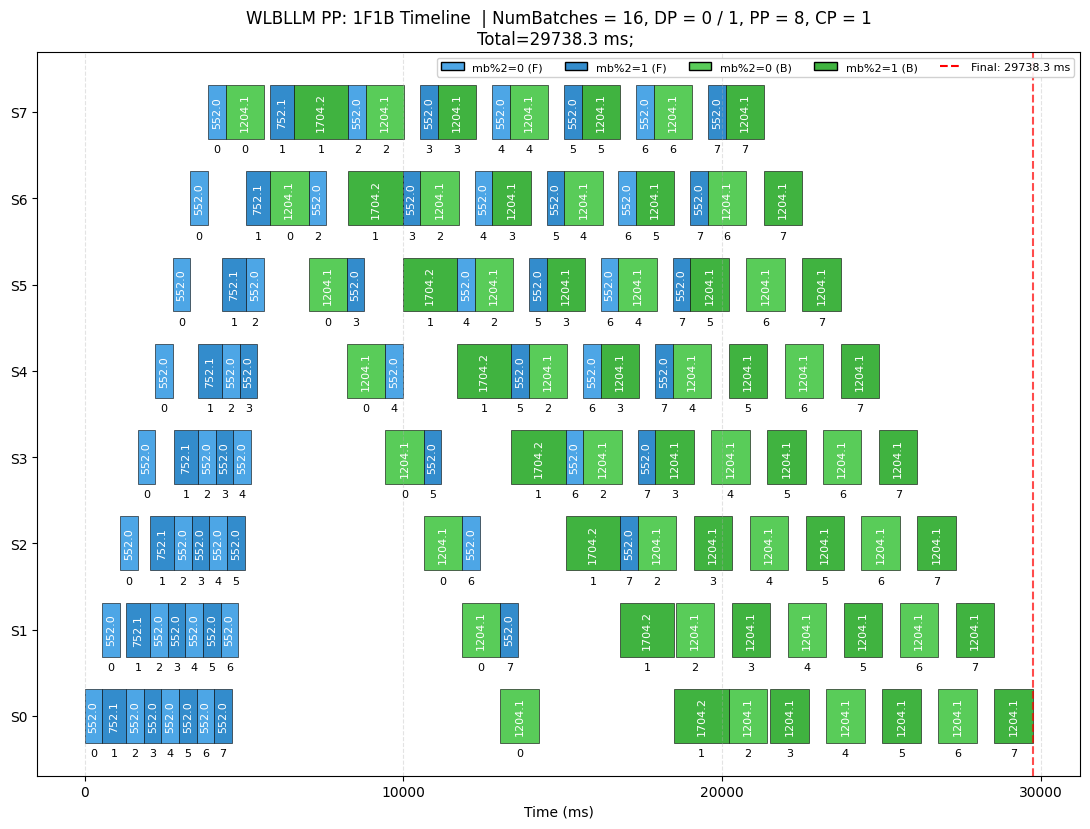

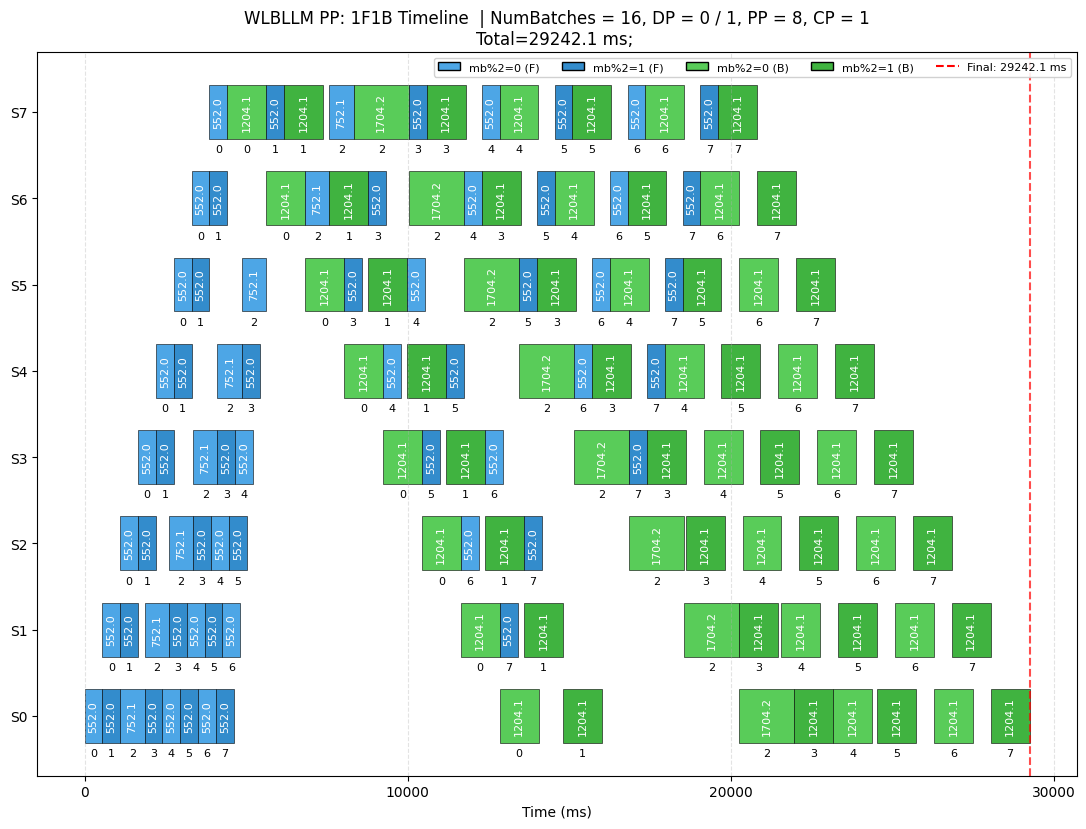

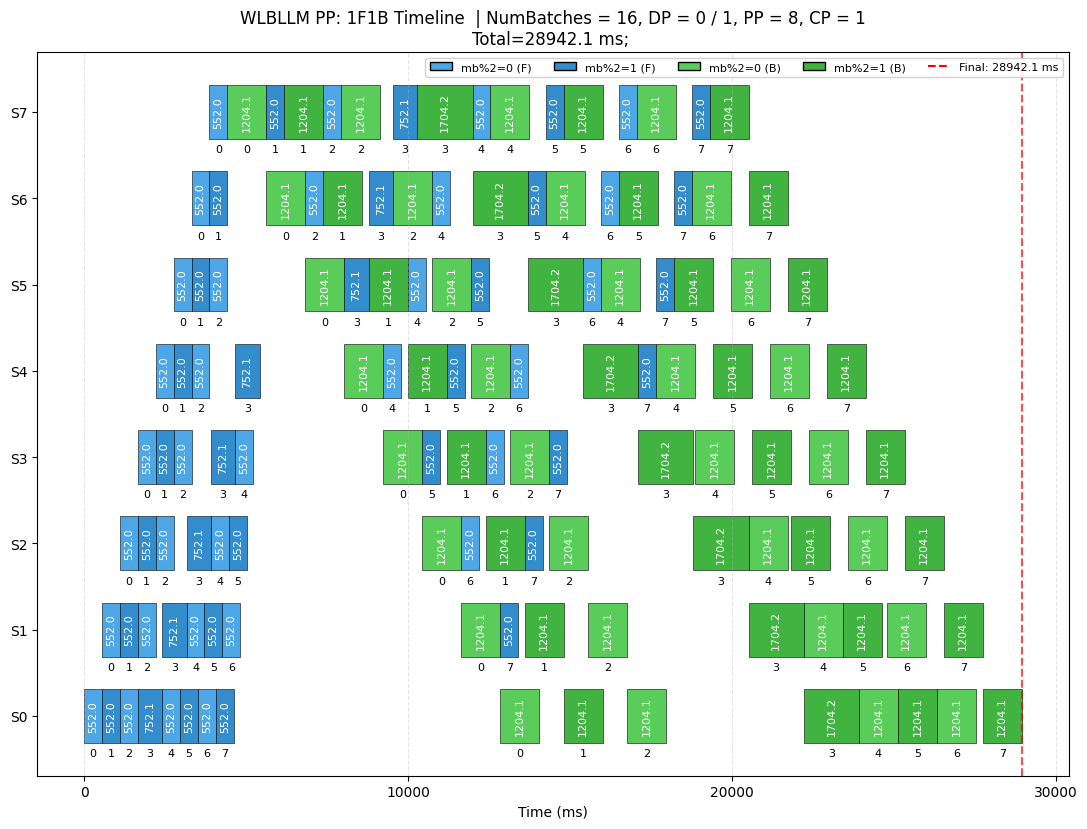

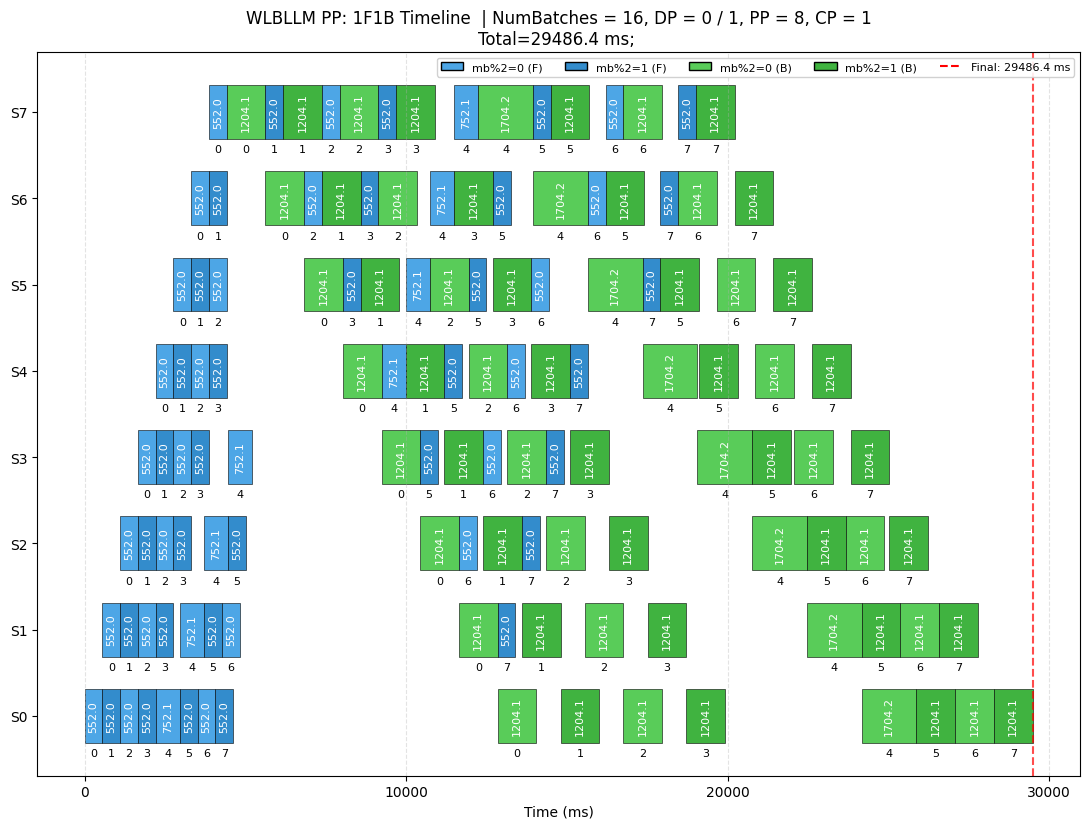

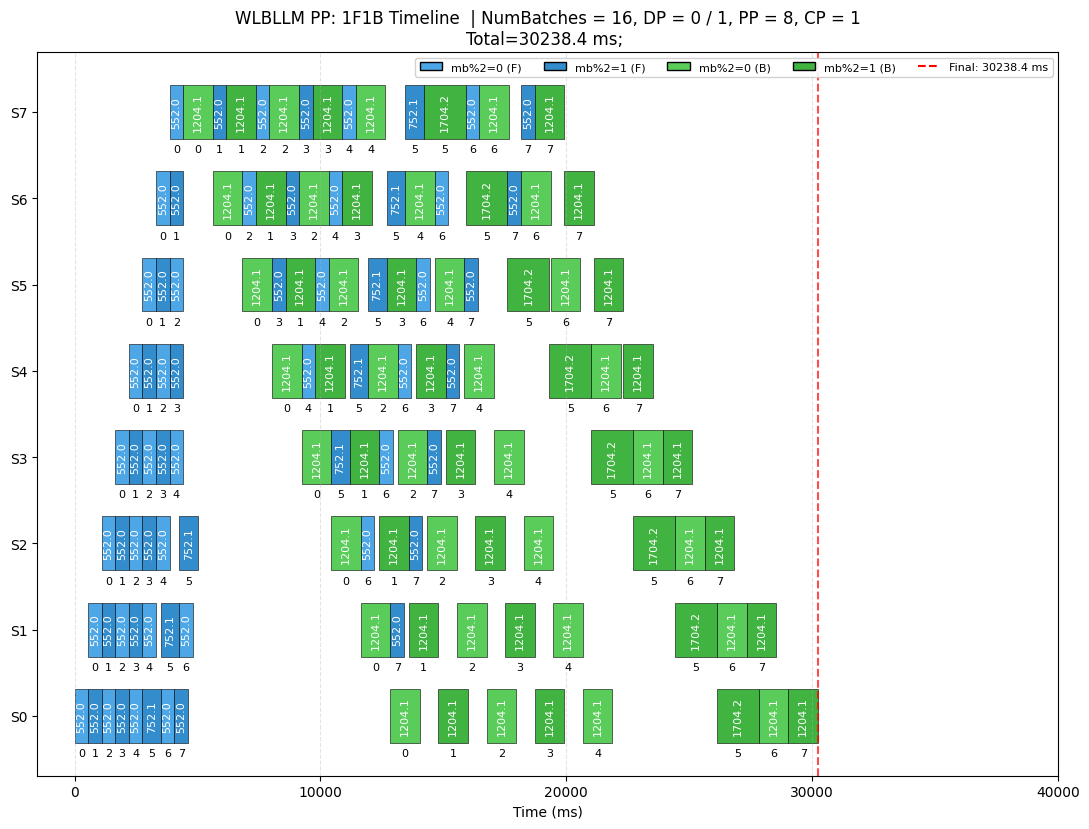

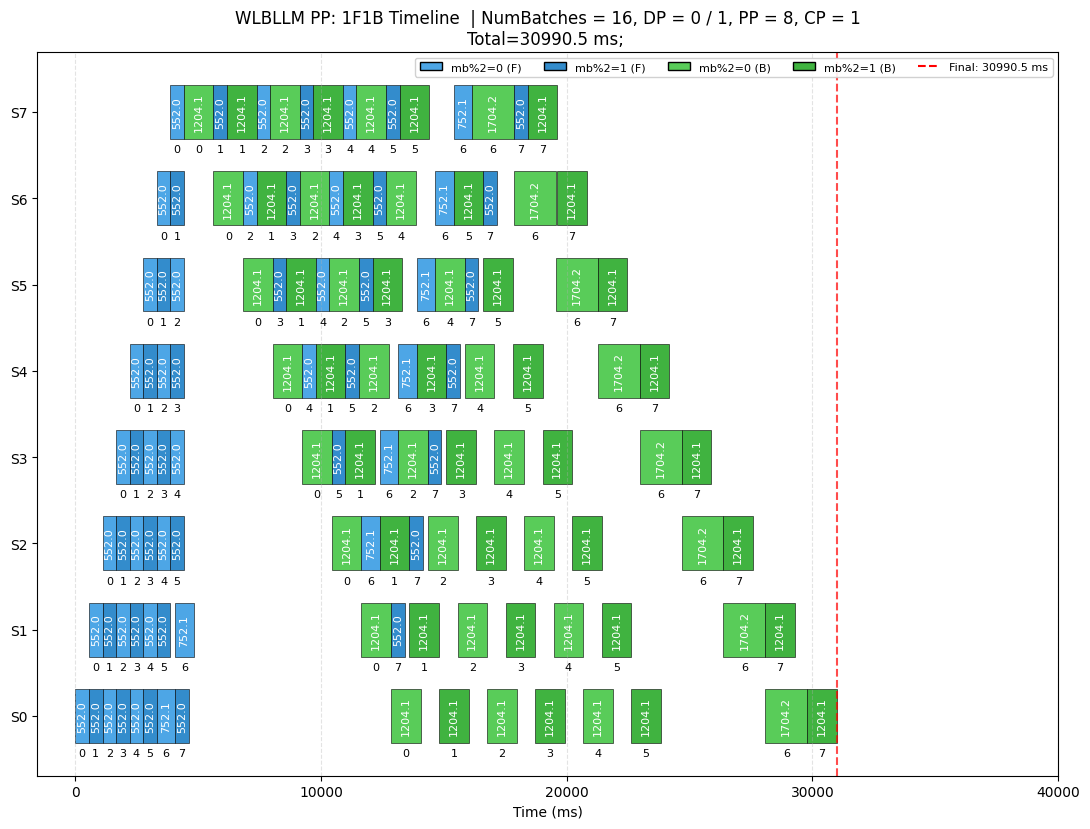

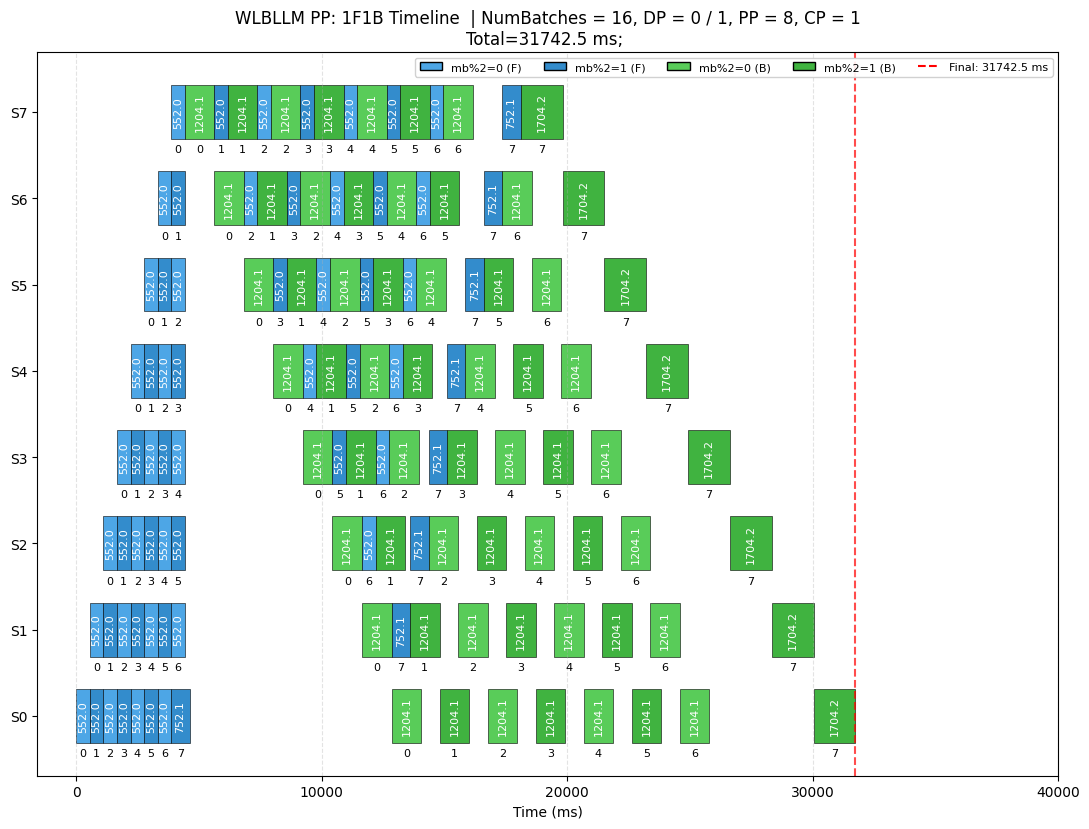

In [ ]:
# %%

# Run WLBLLM

reports = {}

# for wlb_dp_size in [1,2,4,8]:
#     for wlb_cp_size in [1,2,4,8]:
#         for pp_size in [1,2,4,8]:


_batches = [
    [64 * K] * 2,
] * (8 - 1)

disable_wlb_reorder = True


for idx in range(8):
    batches = _batches.copy()
    batches.insert(idx, [128 * K])
    # print(f"Insert [128 * K] at idx = {idx}: {batches}")

    for (wlb_dp_size, wlb_cp_size, pp_size) in [
        (1, 1, 8),
        # (1, 1, 4),
        # (1, 1, 2),
    ]:
        # if wlb_dp_size * wlb_cp_size * pp_size != 8:
        #     continue

        DP = wlb_dp_size
        CP = wlb_cp_size
        PP = pp_size
        factor = 4

        max_time = 0
        if disable_wlb_reorder:
            new_batches = batches
        else:
            num_buckets = min(DP * PP * factor, len(batches)) # to make PP enter steady state
            new_batches = sim_pp_wlb.get_workload_balancing_batches_no_defer(
                batches, num_buckets=num_buckets,
            )

        # print(f"{DP = } {CP = } {PP = }: {len(new_batches) = }, {sum(sum(b) for b in new_batches)}")
        for dp_rank in range(DP):
            dp_batch = new_batches[dp_rank * (PP * factor): (dp_rank + 1) * (PP * factor)]
            # print(f"DP Rank = {dp_rank}: {len(dp_batch) = }, dp_batch = {dp_batch}")
            # print(dp_batch)
            wlbllm_events = sim_pp_wlb.run_iteration(
                dp_batch, 
                PP, 
                nlayers=nlayers, 
                wlb_cp=wlb_cp_size,
            )

            _ = sim_pp_wlb.plot_timeline(
                wlbllm_events,
                title_suffix=(
                    f" | NumBatches = {num_batches}, DP = {dp_rank} / {wlb_dp_size}, "
                    f"PP = {pp_size}, CP = {wlb_cp_size}"
                ),
                granularity=10000, 
                save_path="wlbllm_timeline.png"
            )
            # plt.show()
            wlb_end_time = max([e[-1] for e in wlbllm_events])
            max_time = max(max_time, wlb_end_time)
            # print(f"WLBLLM End Time DP Rank = {dp_rank}: {wlb_end_time}ms")
        # print(f"WLBLLM {DP = } {CP = } {PP = }: {max_time}ms")
        reports[(idx, DP, CP, PP)] = max_time


for (idx, DP, CP, PP), max_time in reports.items():
    print(f"{idx = } {DP = } {CP = } {PP = }: {max_time:.2f} ms")

# %%[markdown]

 ## D2

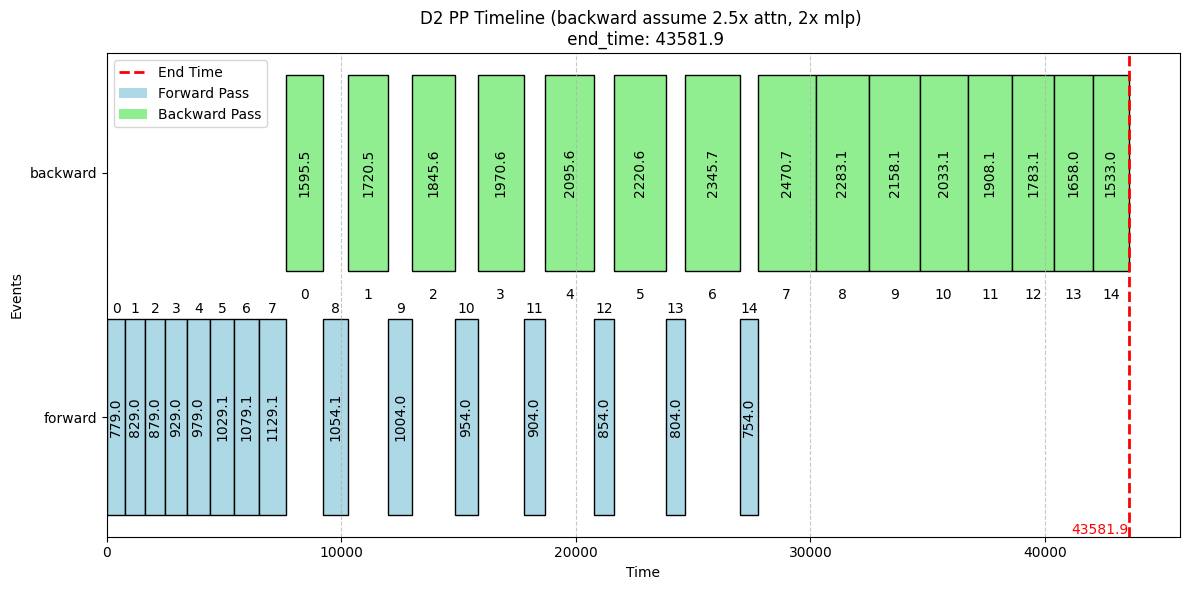

D2 End Time:  43581.90400000001


In [ ]:
# %%

batches = [
    [64 * K] * 2,
] * 15
batches.insert(0, [128 * K])

d2_batches = pair(batches)
d2_events = sim_pp_d2.simulate_d2_pipeline(
    d2_batches, pp_size=pp_size, 
    dpcp_size=d2_dpcp_size,
    nlayers=nlayers,
    verbose=False
)
sim_pp_d2.plot_d2_timeline(d2_events, save_path="d2_timeline.png")
plt.show()

d2_end_time = max([e[-1] for e in d2_events])
print("D2 End Time: ", d2_end_time)

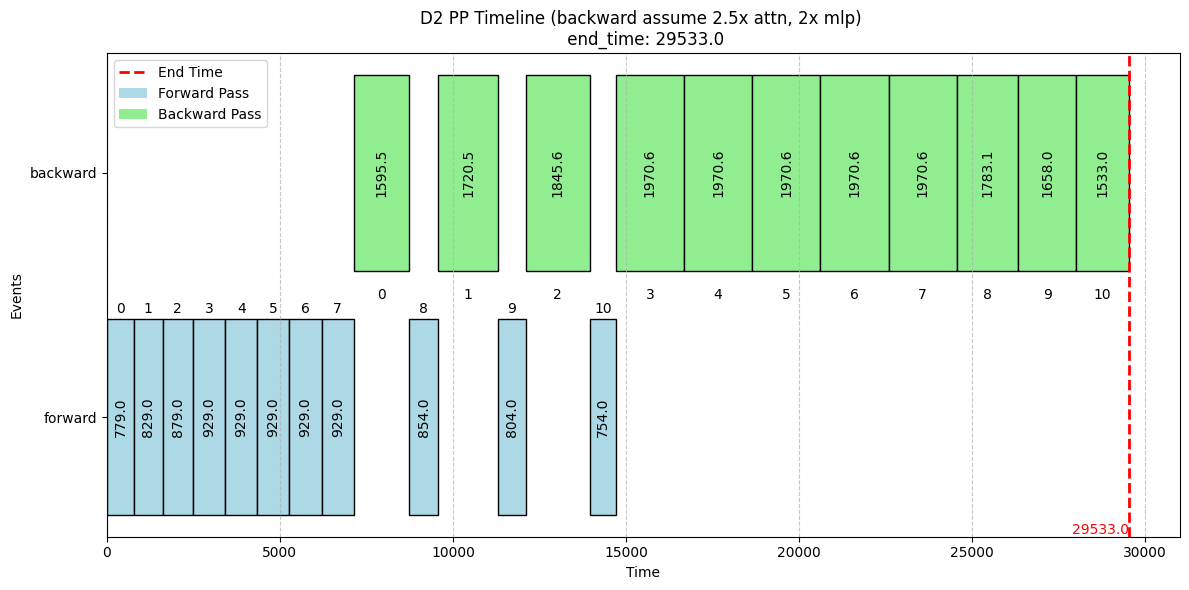

D2 End Time:  29533.008


In [ ]:
# %%

batches = [
    [64 * K] * 2,
] * 7
batches.insert(0, [128 * K])

d2_batches = pair(batches)
d2_events = sim_pp_d2.simulate_d2_pipeline(
    d2_batches, pp_size=pp_size, 
    dpcp_size=d2_dpcp_size,
    nlayers=nlayers,
    verbose=False
)
sim_pp_d2.plot_d2_timeline(d2_events, save_path="d2_timeline.png")
plt.show()

d2_end_time = max([e[-1] for e in d2_events])
print("D2 End Time: ", d2_end_time)